********* THIS IS CMD FOR NGC 3 ************


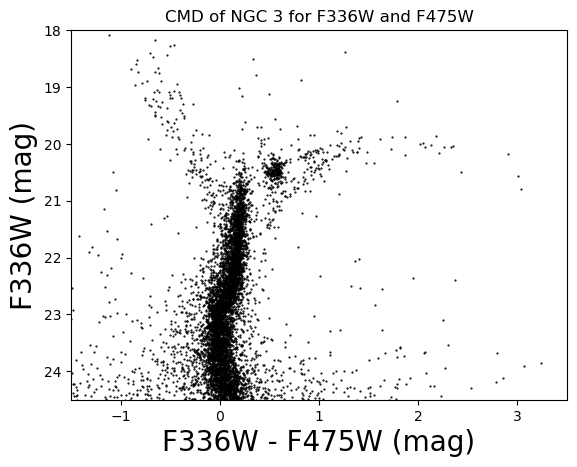

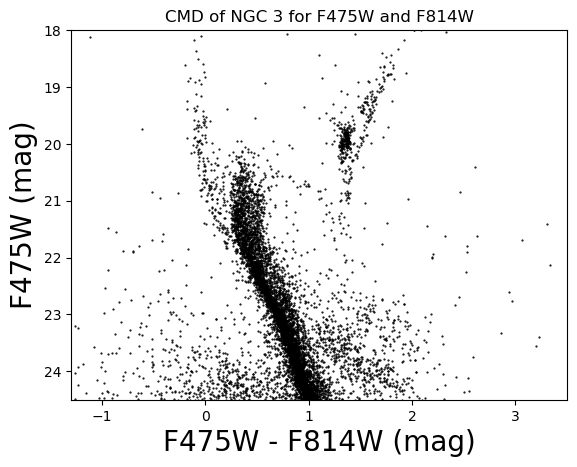

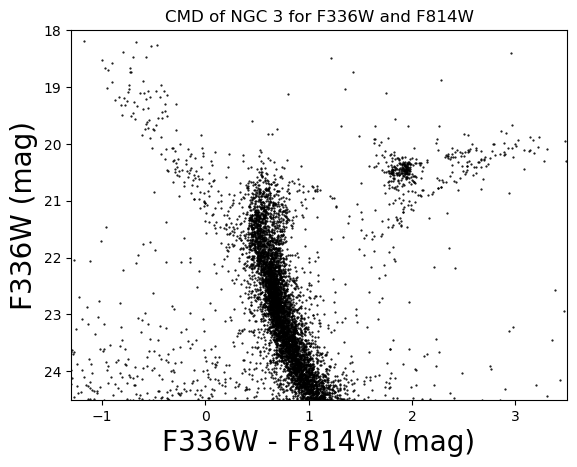

loading of data is completed in [5.476011037826538] seconds


In [1]:
#%matplotlib qt  
%matplotlib inline

import time
start_time = time.time()

import math
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import zscore

plt.style.use("default")

my_data_1 = np.loadtxt('336_475_1.2_color-mag')
x_data_1 = my_data_1[:,2]   # f336w - f475w
y_data_1 = my_data_1[:,0]   # f336w

my_data_2 = np.loadtxt('475_814_1.2_color-mag')
x_data_2 = my_data_2[:,2]   # f475w - f814w
y_data_2 = my_data_2[:,0]   # f475w 

my_data_3 = np.loadtxt('336_814_1.2_color-mag')
x_data_3 = my_data_3[:,2]   # f336w - f814w
y_data_3 = my_data_3[:,0]   # f336w

#c_index = np.loadtxt('all_three')
#c_index_x = c_index[:,9]
#c_index_y = c_index[:,4]

print("********* THIS IS CMD FOR NGC 3 ************")
plt.figure()
plt.scatter(x_data_1, y_data_1, 0.3, 'black')
plt.xlim(-1.5, 3.5)
plt.ylim(18, 24.5)
plt.gca().invert_yaxis()
plt.xlabel("F336W - F475W (mag)", fontsize=20)
plt.ylabel("F336W (mag)", fontsize=20)
plt.title('CMD of NGC 3 for F336W and F475W', fontsize=12)
plt.show()

plt.figure()
plt.scatter(x_data_2, y_data_2, 0.3, 'black')
plt.xlim(-1.3, 3.5)
plt.ylim(18, 24.5)
plt.gca().invert_yaxis()
plt.xlabel("F475W - F814W (mag)", fontsize=20)
plt.ylabel("F475W (mag)", fontsize=20)
plt.title('CMD of NGC 3 for F475W and F814W', fontsize=12)
plt.show() 

plt.figure()
plt.scatter(x_data_3, y_data_3, 0.3, 'black')
plt.xlim(-1.3 , 3.5)
plt.ylim(18, 24.5)
plt.gca().invert_yaxis()
plt.xlabel("F336W - F814W (mag)", fontsize=20)
plt.ylabel("F336W (mag)", fontsize=20)
plt.title('CMD of NGC 3 for F336W and F814W', fontsize=12)
plt.show()


print('loading of data is completed in [{}] seconds'.format(time.time() - start_time))


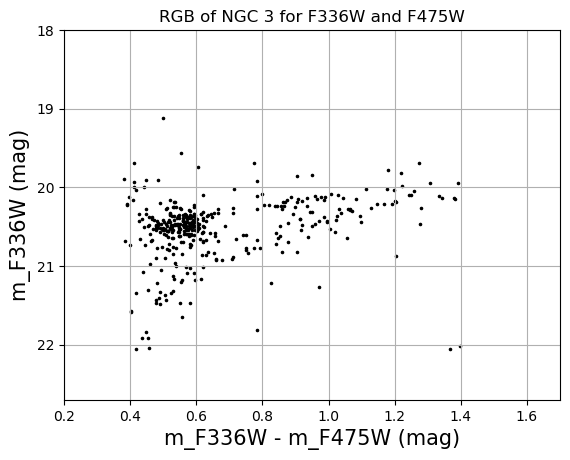

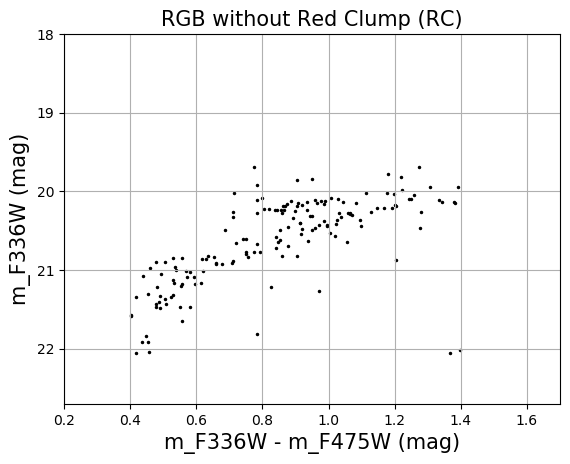

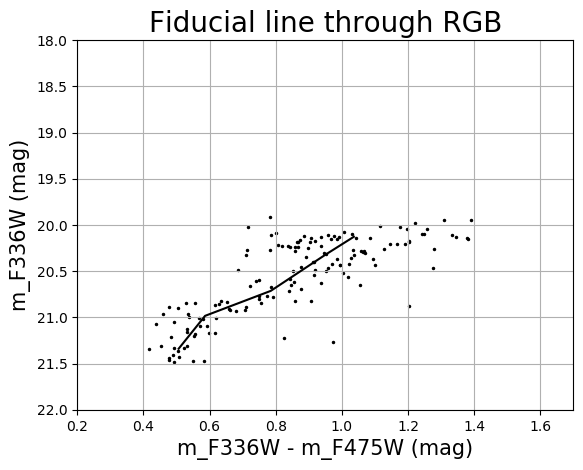

/home/shalmalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


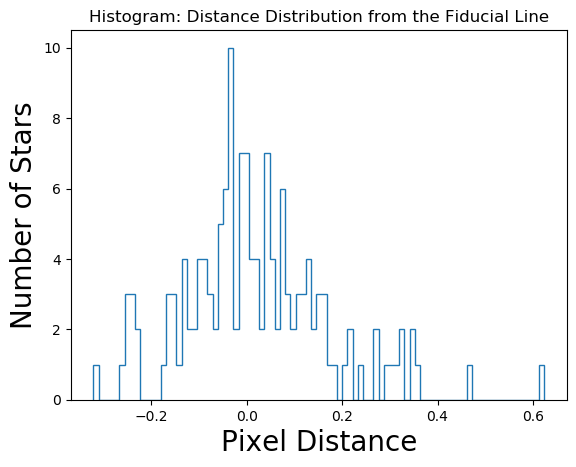

In [2]:
# ***************************F336W and F475W****************************************************
plt.style.use('default')
# For F336W and F475W filters:
first_df = pd.DataFrame({'x_data_1':x_data_1, 'y_data_1':y_data_1})
#print(first_df)
first_df_cut = first_df[(first_df['x_data_1']<=1.4) & (first_df['x_data_1']>= 0.38) & (first_df['y_data_1']<=22.1) & (first_df['y_data_1']>=19.1)]
#print(first_df_cut)
first_df_cut_index = first_df_cut[(first_df_cut.x_data_1 < 0.67) & (first_df_cut.y_data_1 < 20.8)].index.to_numpy()
first_df_cut_1 = first_df_cut.drop(first_df_cut_index)


plt.figure()
plt.grid()
plt.scatter(first_df_cut.x_data_1, first_df_cut.y_data_1,  2.5, 'black')
plt.xlim(0.2,1.7)
plt.ylim(18.0, 22.7)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("RGB of NGC 3 for F336W and F475W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.grid()
plt.scatter(first_df_cut_1.x_data_1, first_df_cut_1.y_data_1, 2.2, 'black')
plt.xlim(0.2,1.7)
plt.ylim(18.0, 22.7)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
first_df_new= pd.DataFrame({'x_data_1':first_df_cut_1.x_data_1,'y_data_1':first_df_cut_1.y_data_1})
#print(df_new)

first_df1_new = first_df_new[(first_df_new['x_data_1']<=1.4) & (first_df_new['x_data_1']>= 0.25) & (first_df_new['y_data_1']<=21.5) & (first_df_new['y_data_1']>=19.9)]
#print(df1_new)
bins = np.linspace(19.9,21.5, num=6) # These are number of bins

md = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = first_df1_new[(first_df1_new['y_data_1'] >= bins[i]) & (first_df1_new['y_data_1'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_1'])
    y_median = np.median(tempdf['y_data_1'])
    md.iloc[i]=[x_median, y_median]
    
#print(md)

plt.figure()
plt.plot(md['x_med'], md['y_med'], 'black')
plt.grid()
plt.scatter(first_df1_new['x_data_1'], first_df1_new['y_data_1'], 2.2, 'black', zorder=0) # zorder= is used when you are lazy. 
plt.xlim(0.2, 1.7)
plt.ylim(18, 22)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

first_a = pd.cut(first_df1_new.y_data_1, bins)
first_b = first_df1_new.groupby(['y_data_1', first_a]).y_data_1.median()

first_df2 = pd.DataFrame({'values':first_b})
np.savetxt('cut_group_1.txt', first_df2)

first_df1_new['x_diff_new_1'] = first_df1_new.groupby(first_a).apply(lambda grp: grp.x_data_1 - grp.x_data_1.median()).values
plt.hist(first_df1_new.x_diff_new_1,bins=87,  cumulative=False,histtype='step',orientation='vertical' )
plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.20, 0.21)
plt.show()
# ******************************************End of F336W and F475W*****

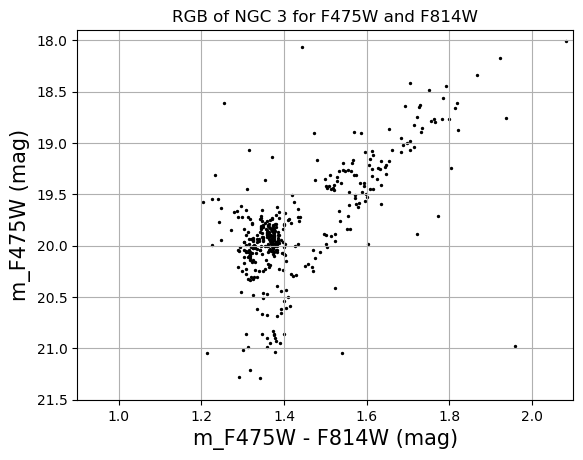

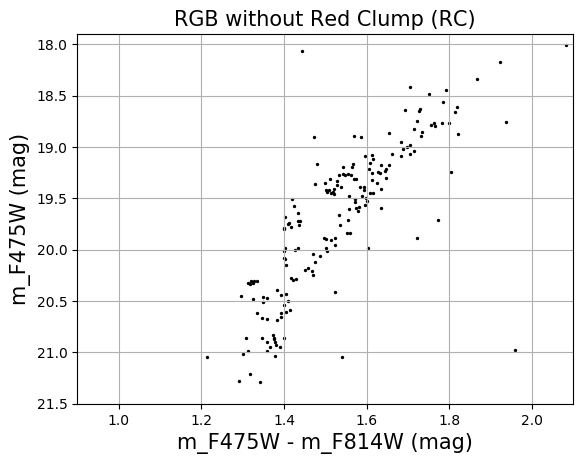

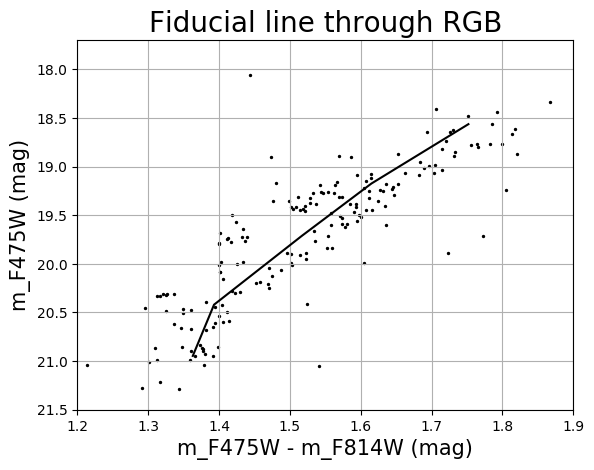

/home/shalmalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


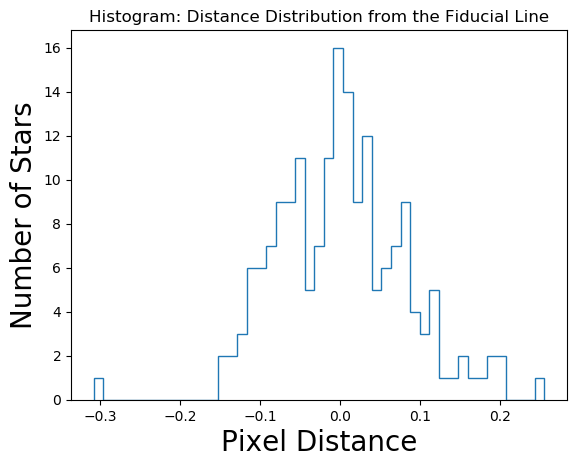

In [3]:
# ******************************************Start of F475W and F814W**************************************

# For F475W and F814W filters 
second_df = pd.DataFrame({'x_data_2':x_data_2, 'y_data_2':y_data_2})
#print(second_df)
second_df_cut = second_df[(second_df['x_data_2']<=2.2 ) & (second_df['x_data_2']>=1.2) & (second_df['y_data_2']<=21.3) & (second_df['y_data_2']>=18)]
#print(second_df_cut)
second_df_cut_index = second_df_cut[(second_df_cut.x_data_2 < 1.4) & (second_df_cut.y_data_2 <20.3 )].index.to_numpy()
second_df_cut_1 = second_df_cut.drop(second_df_cut_index)


plt.figure()
plt.grid()
#plt.scatter(x_data_2, y_data_2, 0.3, 'red')
plt.scatter(second_df_cut.x_data_2, second_df_cut.y_data_2, 2.0, 'black')
plt.xlim(0.9,2.1)
plt.ylim(17.9, 21.5)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB of NGC 3 for F475W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.grid()
plt.scatter(second_df_cut_1.x_data_2, second_df_cut_1.y_data_2, 2.0, 'black')
plt.xlim(0.9,2.1)
plt.ylim(17.9, 21.5)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
second_df_new= pd.DataFrame({'x_data_2':second_df_cut_1.x_data_2,'y_data_2':second_df_cut_1.y_data_2})
#print(df_new)

second_df1_new = second_df_new[(second_df_new['x_data_2']<=1.9) & (second_df_new['x_data_2']>=0.25 ) & (second_df_new['y_data_2']<=22.0) & (second_df_new['y_data_2']>=18.0)]
#print(df1_new)
bins = np.linspace(18,21.5, num=6) # These are number of bins

md = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = second_df1_new[(second_df1_new['y_data_2'] >= bins[i]) & (second_df1_new['y_data_2'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_2'])
    y_median = np.median(tempdf['y_data_2'])
    md.iloc[i]=[x_median, y_median]
    
#print(md)
plt.figure()
plt.plot(md['x_med'], md['y_med'], 'black')
plt.grid()
plt.scatter(second_df1_new['x_data_2'], second_df1_new['y_data_2'], 2.0, 'black', zorder=0) # zorder= is used when you are lazy. 
plt.xlim(1.2, 1.9)
plt.ylim(17.7, 21.5)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

second_a = pd.cut(second_df1_new.y_data_2, bins)
second_b = second_df1_new.groupby(['y_data_2', second_a]).y_data_2.median()

second_df2 = pd.DataFrame({'values':second_b})
np.savetxt('cut_group_1.txt', second_df2)

second_df1_new['x_diff_new_2'] = second_df1_new.groupby(second_a).apply(lambda grp: grp.x_data_2 - grp.x_data_2.median()).values
plt.hist(second_df1_new.x_diff_new_2, bins=47,histtype='step')
plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.20, 0.21)
plt.show()
# ********************************************End of F475W and F814W***

169


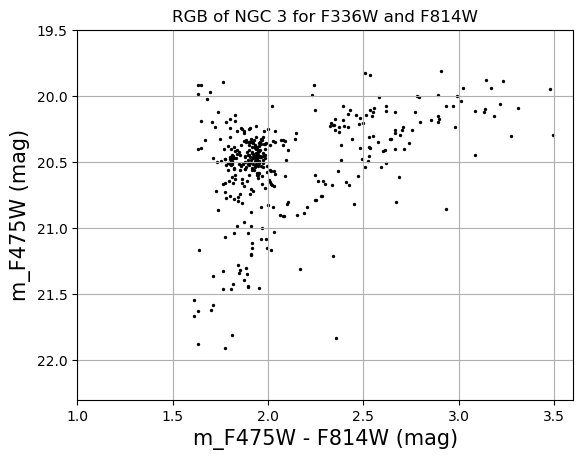

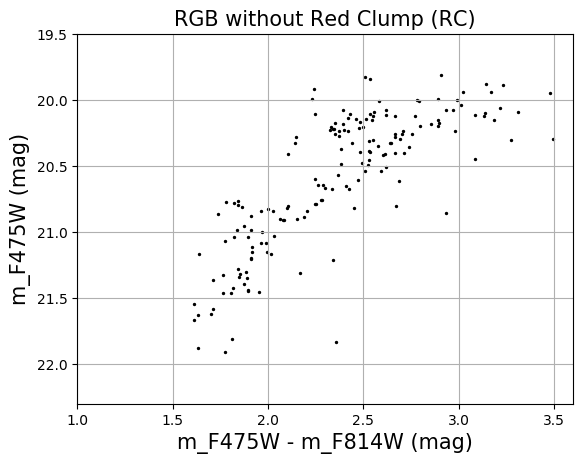

169


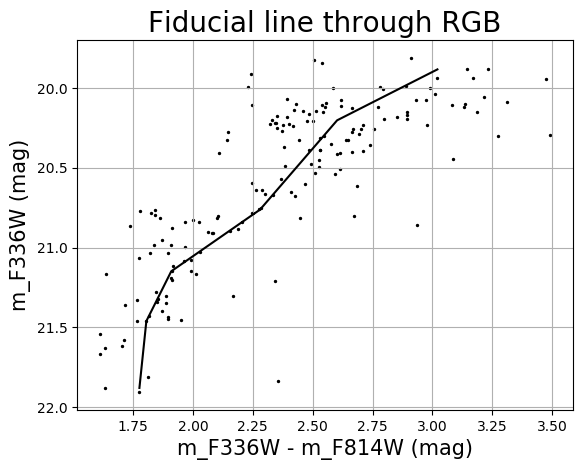

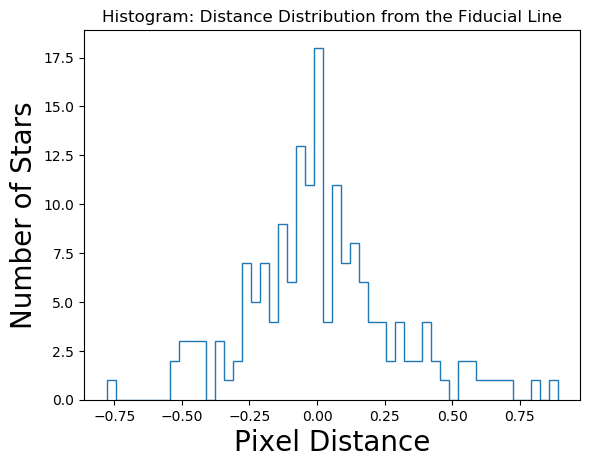

In [4]:
# ********************************************Start of F336W and F814W**************************************************

# For F336W and F814W filters
third_df = pd.DataFrame({'x_data_3':x_data_3, 'y_data_3':y_data_3})
#print(third_df)
third_df_cut = third_df[(third_df['x_data_3']<=3.5) & (third_df['x_data_3']>= 1.6) & (third_df['y_data_3']<=22) & (third_df['y_data_3']>=19.8)]
#print(third_df_cut)
third_df_cut_index = third_df_cut[(third_df_cut.x_data_3 < 2.1) & (third_df_cut.y_data_3 < 20.76)].index.to_numpy()
third_df_cut_1 = third_df_cut.drop(third_df_cut_index)
print(len(third_df_cut_1))

plt.figure()
plt.grid()
plt.scatter(third_df_cut.x_data_3, third_df_cut.y_data_3, 2.0, 'black')
plt.xlim(1.0,3.6)
plt.ylim(19.5, 22.3)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB of NGC 3 for F336W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.grid()
plt.scatter(third_df_cut_1.x_data_3, third_df_cut_1.y_data_3, 2.0, 'black')
plt.xlim(1.0,3.6)
plt.ylim(19.5, 22.3)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
third_df_new= pd.DataFrame({'x_data_3':third_df_cut_1.x_data_3,'y_data_3':third_df_cut_1.y_data_3})
#print(df_new)

third_df1_new = third_df_new[(third_df_new['x_data_3']<=3.5) & (third_df_new['x_data_3']>= 1.5) & (third_df_new['y_data_3']<=22) & (third_df_new['y_data_3']>=19.5)]
print(len(third_df1_new))
bins = np.linspace(19.5,22.3, num=7) # These are number of bins

md = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = third_df1_new[(third_df1_new['y_data_3'] >= bins[i]) & (third_df1_new['y_data_3'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_3'])
    y_median = np.median(tempdf['y_data_3'])
    md.iloc[i]=[x_median, y_median]
    
#print(md)

plt.figure()
plt.plot(md['x_med'], md['y_med'], 'black')
plt.grid()
plt.scatter(third_df1_new['x_data_3'], third_df1_new['y_data_3'], 2.0, 'black', zorder=0) # zorder= is used when you are lazy. 
#plt.xlim(1.45, 3.5)
#plt.ylim(19.7, 21.9)
plt.xlabel('m_F336W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

third_a = pd.cut(third_df1_new.y_data_3, bins)
third_b = third_df1_new.groupby(['y_data_3', third_a]).y_data_3.median()

third_df2 = pd.DataFrame({'values':third_b})
np.savetxt('cut_group_1.txt', third_df2)

third_df1_new['x_diff_new_3'] = third_df1_new.groupby(third_a).apply(lambda grp: grp.x_data_3 - grp.x_data_3.median()).values
plt.hist(third_df1_new.x_diff_new_3, bins=50,histtype='step' )
plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.10, 0.11)
plt.show()

#*****************************************End of F336W and F814W*******

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 3')

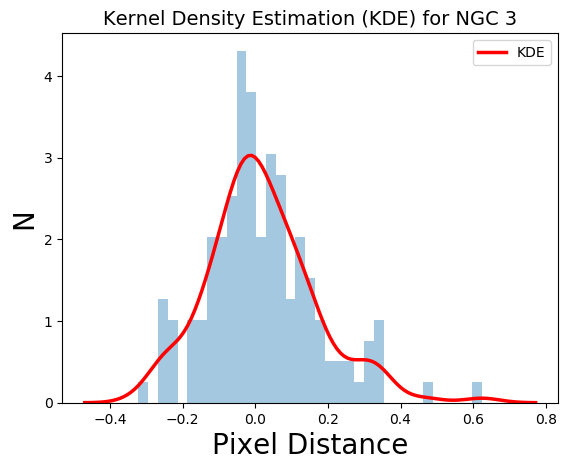

In [5]:
sns.distplot(first_df1_new.x_diff_new_1, 35,kde_kws={"color": "red", "lw": 2.5, "label": "KDE"} )
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 3', fontsize=14)



Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 3')

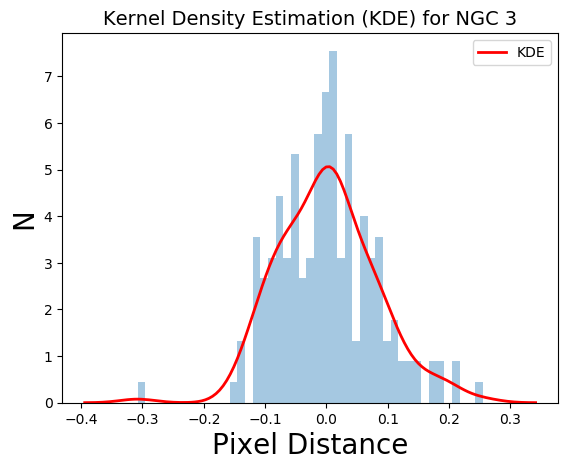

In [6]:
sns.distplot(second_df1_new.x_diff_new_2, 45, kde_kws={"color": "red", "lw": 2.0, "label": "KDE"})
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 3', fontsize=14)

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 3')

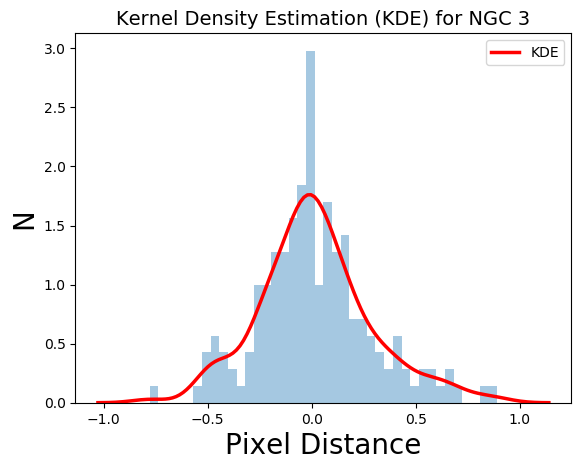

In [7]:
sns.distplot(third_df1_new.x_diff_new_3,40,kde_kws={"color": "red", "lw": 2.5, "label": "KDE"} )
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 3', fontsize=14)

In [8]:
data = pd.read_csv('all_three_all.csv', sep=',', na_values=".")
data

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,99.999,99.999,0.000,99.999,99.999,0.0,99.999,99.999,0.000,0.000
1,99.999,99.999,0.000,99.999,99.999,0.0,99.999,99.999,0.000,0.000
2,99.999,99.999,0.000,99.999,99.999,0.0,99.999,99.999,0.000,0.000
3,99.999,99.999,0.000,99.999,99.999,0.0,99.999,99.999,0.000,0.000
4,99.999,99.999,0.000,99.999,99.999,0.0,20.775,15.190,5.585,5.585
...,...,...,...,...,...,...,...,...,...,...
180313,31.822,29.315,2.507,2.507,NaN,NaN,NaN,NaN,NaN,NaN
180314,31.755,27.853,3.902,3.902,NaN,NaN,NaN,NaN,NaN,NaN
180315,31.878,29.297,2.581,2.581,NaN,NaN,NaN,NaN,NaN,NaN
180316,30.629,28.054,2.575,2.575,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mask = (data['col1'] < 99.999) & (data['col2'] < 99.999) & (data['col4'] < 99.999) & (data['col5'] < 99.999) & (data['col7'] < 99.999) & (data['col8'] <  99.999 )
mask
filtered_data = data[mask]
print(filtered_data)
filtered_data.to_csv('filtered_data.csv', index=False, float_format='%.3f')

          col1    col2   col3    col4    col5   col6    col7    col8   col9  \
20      19.116  18.618  0.498  20.038  16.452  3.586  18.876  16.595  2.281   
23      18.445  18.981 -0.536  18.980  17.275  1.705  19.108  17.356  1.752   
29      20.209  19.063  1.146  18.836  17.705  1.131  20.197  17.398  2.799   
34      20.155  19.170  0.985  19.192  17.628  1.564  20.149  17.606  2.543   
43      19.142  19.643 -0.501  19.450  18.281  1.169  17.485  18.807 -1.322   
...        ...     ...    ...     ...     ...    ...     ...     ...    ...   
168773  29.698  34.227 -4.529  28.696  27.879  0.817  27.780  27.110  0.670   
168775  32.020  31.217  0.803  28.871  27.336  1.535  30.273  26.802  3.471   
168778  28.803  31.939 -3.136  32.416  27.531  4.885  27.292  27.665 -0.373   
168779  29.622  28.415  1.207  29.849  29.525  0.324  27.500  27.057  0.443   
168785  29.730  32.955 -3.225  28.155  27.895  0.260  26.842  27.019 -0.177   

         col10  
20      -4.393  
23      -2.194  


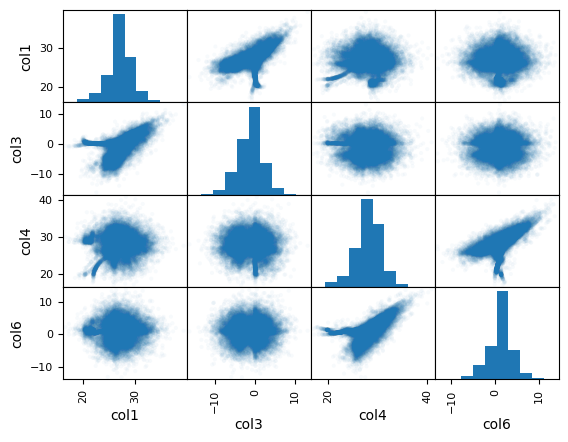

In [10]:
from pandas import plotting
plotting.scatter_matrix(filtered_data[['col1','col3','col4','col6']],0.03)

plt.show()

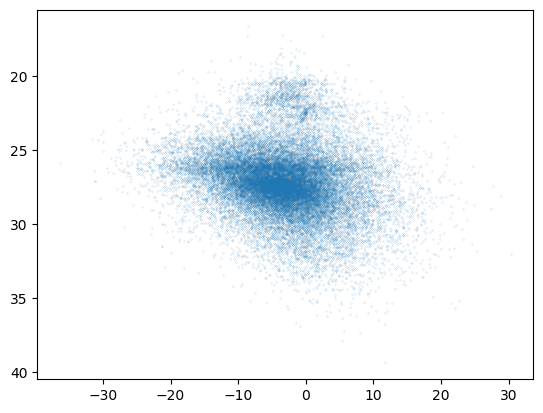

In [11]:
plt.figure()
plt.scatter(filtered_data['col10'], filtered_data['col1'], 0.008)
plt.gca().invert_yaxis()

(array([1.40000e+01, 2.75000e+02, 2.03500e+03, 1.31480e+04, 8.08750e+04,
        2.27680e+04, 1.06000e+03, 3.31180e+04, 1.44722e+05, 2.34500e+03]),
 array([-36.354 , -28.6161, -20.8782, -13.1403,  -5.4024,   2.3355,
         10.0734,  17.8113,  25.5492,  33.2871,  41.025 ]),
 <a list of 10 Patch objects>)

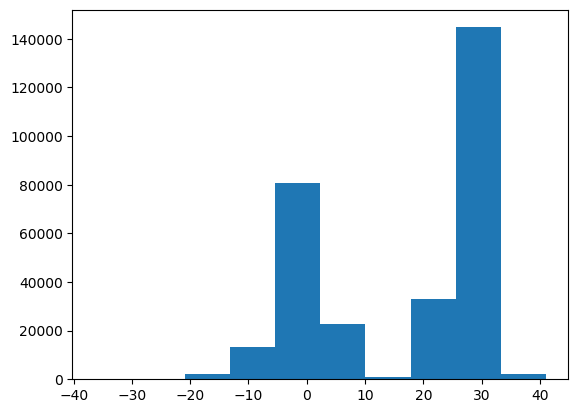

In [12]:
counts, bins1 = np.histogram(filtered_data)
plt.hist(bins1[:-1], bins1, weights=counts)



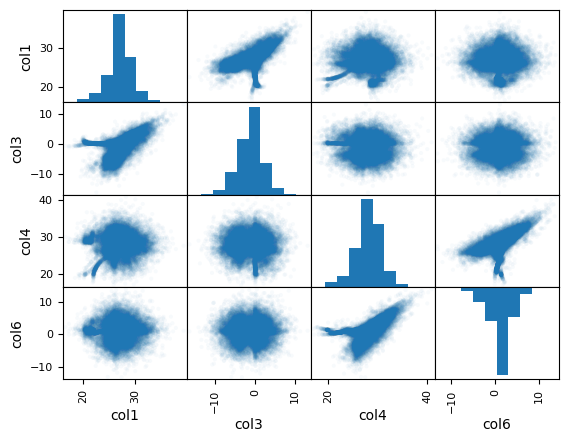

In [13]:
from pandas import plotting
plotting.scatter_matrix(filtered_data[['col1','col3','col4','col6']],0.03)
plt.gca().invert_yaxis()
plt.show()

In [14]:
print(my_data_1)

[[ 99.999  99.999   0.   ]
 [ 99.999  99.999   0.   ]
 [ 99.999  99.999   0.   ]
 ...
 [ 29.654  99.999 -70.345]
 [ 99.999  28.346  71.653]
 [ 29.73   32.955  -3.225]]
